<a href="https://colab.research.google.com/github/LujainAK/GP/blob/main/LBPCrCb224SVMCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Support Vector Machine Code (LBP Cr + Cb)

###Import the libraries

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import cv2
from sklearn.svm import SVC
import os
import random
import pickle

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Import the dataset

In [3]:
# LBP training
lbpGrayPath_training = '/content/drive/MyDrive/Colab Notebooks/ODIR Dataset/LBP/LBP_training/lbpGrayImages_training'
lbp_CbPath_training = '/content/drive/MyDrive/Colab Notebooks/ODIR Dataset/LBP/LBP_training/lbpCbImages_training'
lbp_CrPath_training = '/content/drive/MyDrive/Colab Notebooks/ODIR Dataset/LBP/LBP_training/lbpCrImages_training'

# LBP testing
lbpGrayPath_testing = '/content/drive/MyDrive/Colab Notebooks/ODIR Dataset/LBP/LBP_testing/lbpGrayImages_testing'
lbp_CbPath_testing = '/content/drive/MyDrive/Colab Notebooks/ODIR Dataset/LBP/LBP_testing/lbpCbImages_testing'
lbp_CrPath_testing = '/content/drive/MyDrive/Colab Notebooks/ODIR Dataset/LBP/LBP_testing/lbpCrImages_testing'

all_data_csv = '/content/drive/MyDrive/Colab Notebooks/ODIR Dataset/all_data.csv'
df = pd.read_csv(all_data_csv)

In [4]:
df.head()

,ID,filename,class_name,target
0,0,0_right.jpg,Normal,"[1, 0, 0, 0, 0]"
1,1,1_right.jpg,Normal,"[1, 0, 0, 0, 0]"
2,2,2_right.jpg,Diabetes,"[0, 1, 0, 0, 0]"
3,3,4_right.jpg,Diabetes,"[0, 1, 0, 0, 0]"
4,4,5_right.jpg,Diabetes,"[0, 1, 0, 0, 0]"


In [5]:
def load_lbp_features(folder_path, df, img_resize):
  lbp_features = []
  labels = []

  # Iterate through each image in the folder
  for file_path in os.listdir(folder_path):
    image_path = os.path.join(folder_path, file_path)

    # Read the image
    image = cv2.imread(image_path, 0)
    image_resized = cv2.resize(image, (img_resize,img_resize))

    # Add LBP feature and label to the lists
    lbp_features.append(image_resized.flatten())

    # Find matching filename in the DataFrame
    filename_match = df[df['filename'] == file_path]

    if not filename_match.empty:
      # Get the label from the 'class_name' column
      label = filename_match['class_name'].values[0]
      labels.append(label)

  return np.array(lbp_features), np.array(labels)

In [6]:
def load_lbp_features_concat(folder_path1, folder_path2, df, img_resize):
  lbp_features = []
  labels = []
  image_count = 0

  # Iterate through each image in the folder
  for file_path in os.listdir(folder_path1):
    image_count += 1
    print(f"Reading image {image_count}")

    image_path1 = os.path.join(folder_path1, file_path)
    image_path2 = os.path.join(folder_path2, file_path)

    # Read the image
    image1 = cv2.imread(image_path1, 0)
    image_resized1 = cv2.resize(image1, (img_resize,img_resize))

    image2 = cv2.imread(image_path2, 0)
    image_resized2 = cv2.resize(image2, (img_resize,img_resize))

    # Flatten the two images
    image_flattened1 = image_resized1.flatten()
    image_flattened2 = image_resized2.flatten()

    # Concat the two images
    concatenated_image = np.concatenate((image_flattened1, image_flattened2))

    # Add LBP feature and label to the lists
    lbp_features.append(concatenated_image)

    # Find matching filename in the DataFrame
    filename_match = df[df['filename'] == file_path]

    if not filename_match.empty:
      # Get the label from the 'class_name' column
      label = filename_match['class_name'].values[0]
      labels.append(label)

  return np.array(lbp_features), np.array(labels)

In [7]:
xtrain, ytrain = load_lbp_features_concat(lbp_CrPath_training, lbp_CbPath_training, df, 128)

Streaming output truncated to the last 5000 lines.
Reading image 5056
Reading image 5057
Reading image 5058
Reading image 5059
Reading image 5060
Reading image 5061
Reading image 5062
Reading image 5063
Reading image 5064
Reading image 5065
Reading image 5066
Reading image 5067
Reading image 5068
Reading image 5069
Reading image 5070
Reading image 5071
Reading image 5072
Reading image 5073
Reading image 5074
Reading image 5075
Reading image 5076
Reading image 5077
Reading image 5078
Reading image 5079
Reading image 5080
Reading image 5081
Reading image 5082
Reading image 5083
Reading image 5084
Reading image 5085
Reading image 5086
Reading image 5087
Reading image 5088
Reading image 5089
Reading image 5090
Reading image 5091
Reading image 5092
Reading image 5093
Reading image 5094
Reading image 5095
Reading image 5096
Reading image 5097
Reading image 5098
Reading image 5099
Reading image 5100
Reading image 5101
Reading image 5102
Reading image 5103
Reading image 5104
Reading image 5105

In [8]:
xtrain.shape

(10055, 32768)

In [9]:
xtest, ytest = load_lbp_features_concat(lbp_CrPath_testing, lbp_CbPath_testing, df, 128)

Reading image 1
Reading image 2
Reading image 3
Reading image 4
Reading image 5
Reading image 6
Reading image 7
Reading image 8
Reading image 9
Reading image 10
Reading image 11
Reading image 12
Reading image 13
Reading image 14
Reading image 15
Reading image 16
Reading image 17
Reading image 18
Reading image 19
Reading image 20
Reading image 21
Reading image 22
Reading image 23
Reading image 24
Reading image 25
Reading image 26
Reading image 27
Reading image 28
Reading image 29
Reading image 30
Reading image 31
Reading image 32
Reading image 33
Reading image 34
Reading image 35
Reading image 36
Reading image 37
Reading image 38
Reading image 39
Reading image 40
Reading image 41
Reading image 42
Reading image 43
Reading image 44
Reading image 45
Reading image 46
Reading image 47
Reading image 48
Reading image 49
Reading image 50
Reading image 51
Reading image 52
Reading image 53
Reading image 54
Reading image 55
Reading image 56
Reading image 57
Reading image 58
Reading image 59
Readin

In [10]:
xtest.shape

(4310, 32768)

In [11]:
# sample_image = xtrain[0].reshape(224, 224)
# plt.imshow(sample_image, cmap='gray')
# plt.title('Sample Image')
# plt.show()

###Train the SVM model

In [12]:
model = None
svm_model = '/content/drive/MyDrive/Colab Notebooks/SVM Models/CrCb_svm_default_model.pkl'

if not os.path.exists(svm_model):
  # Default parameters: C=1.0, kernel='rbf', gamma='scale', class_weight=None
  model = SVC()
  model.fit(xtrain, ytrain)

  # Save the svm model as pickle file
  with open(svm_model, 'wb') as file:
    pickle.dump(model, file)
else:
  # load model from pickle file
  with open(svm_model, 'rb') as file:
    model = pickle.load(file)

###Performance Measures

In [13]:
# Make predictions on the training set
y_train_pred = model.predict(xtrain)

In [14]:
# Make predictions on the test set
y_test_pred = model.predict(xtest)

In [15]:
# Calculate performance measures
train_accuracy = accuracy_score(ytrain, y_train_pred)
test_accuracy = accuracy_score(ytest, y_test_pred)
precision = precision_score(ytest, y_test_pred, average='macro')
recall = recall_score(ytest, y_test_pred, average='macro')
f1 = f1_score(ytest, y_test_pred, average='macro')

In [16]:
# Print the performance measures
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Training Accuracy: 0.9289905519641969
Testing Accuracy: 0.5805104408352668
Precision: 0.5763364751040311
Recall: 0.5805104408352668
F1-Score: 0.5358775864713443


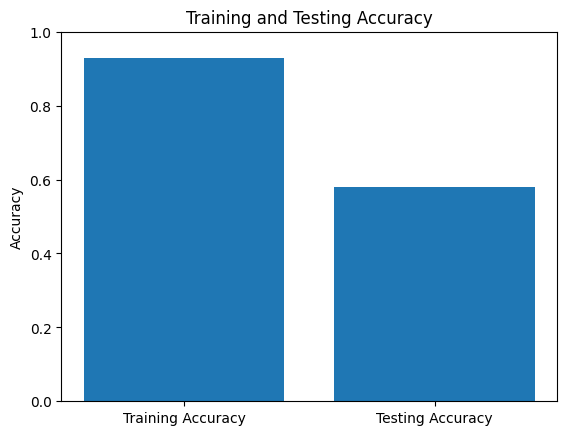

In [17]:
labels = ['Training Accuracy', 'Testing Accuracy']
accuracy = [train_accuracy, test_accuracy]

plt.bar(labels, accuracy)
plt.title('Training and Testing Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis limits to 0 and 1 for accuracy values
plt.show()